In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from calendar import month_name

import warnings 

warnings.filterwarnings("ignore")

In [10]:
messages_df = pd.read_csv('../messages.csv')

members_df = pd.read_csv('../group_members.csv')

In [11]:
messages_df['Date'] = pd.to_datetime(messages_df['Date'])
# messages_df['From'] = messages_df['From'].fillna(0).astype(int)

In [12]:
merged_df = pd.merge(messages_df, members_df, left_on='From', right_on='User ID')

In [13]:
members_message_counts = merged_df.groupby('Username').size()
top_members = members_message_counts.nlargest(20)

In [14]:
columns_to_drop = ['Message ID', 'Text', 'Media', 'Forwarded From', 'User ID', 'First Name', 'Last Name']
df_years = merged_df.copy().drop(columns=columns_to_drop)
df_years['Year'] = df_years['Date'].dt.year
df_years.drop(columns='Date', inplace=True)
years = df_years.groupby(['Username','Year'], as_index=False).size()
top = years[years['Username'].isin(top_members.index)]

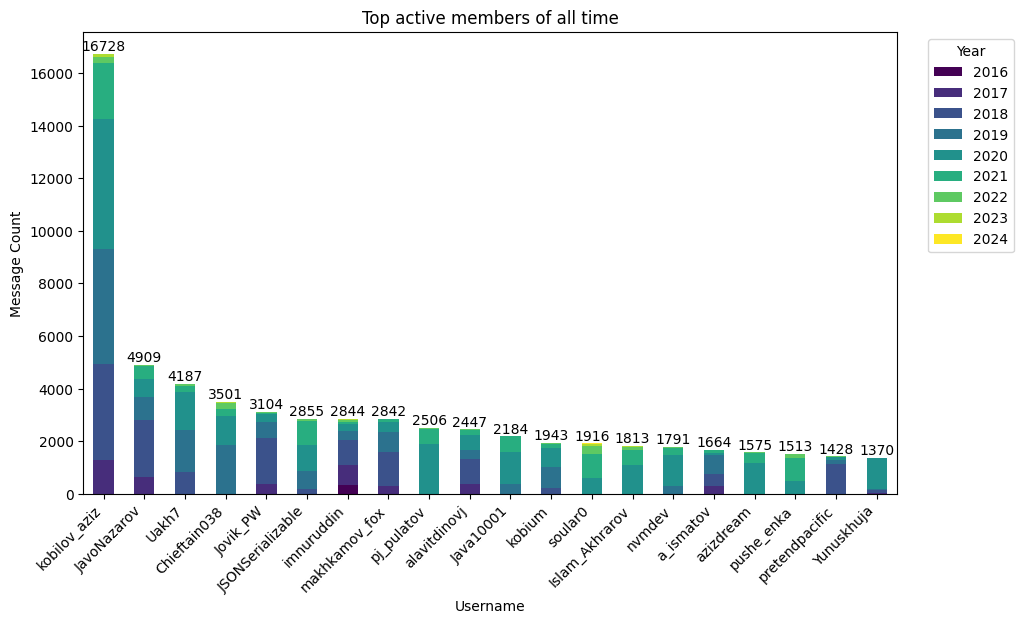

In [15]:
df_2016 = top[top['Year'] == 2016].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2017 = top[top['Year'] == 2017].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2018 = top[top['Year'] == 2018].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2019 = top[top['Year'] == 2019].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2020 = top[top['Year'] == 2020].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2021 = top[top['Year'] == 2021].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2022 = top[top['Year'] == 2022].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2023 = top[top['Year'] == 2023].drop(columns = 'Year').set_index('Username').reindex(top_members.index)
df_2024 = top[top['Year'] == 2024].drop(columns = 'Year').set_index('Username').reindex(top_members.index)

df_for_plot = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], axis=1)

df_for_plot.columns = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

ax = df_for_plot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10.5, 6))

for p, count in zip(ax.patches, top_members):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{count}', (x + width/2, count + 10), ha='center', va='bottom', fontsize=10)


plt.title('Top active members of all time')
plt.xlabel('Username')
plt.ylabel('Message Count')
plt.legend(title='Year', bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.show()